# Customer Churn Prediction

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from datetime import datetime 
from sklearn.model_selection import train_test_split
import time
from sklearn.inspection import permutation_importance
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression

## Load dataset

In [2]:
df=pd.read_csv('Output/cleaned_df.csv')
df.head()

,customer_unique_id,customer_state_cat,avg_delivery_time,avg_review_upload_time,debt_customer,cash_customer,avg_wd_estimated_delivery_time,avg_wd_actual_delivery_time,avg_wd_delivery_time_delta,avg_is_late,product_cat,avg_review_score,avg_freight_value,avg_payment_value,avg_payment_installments,is_churn
0,0000366f3b9a7992bf8c76cfdf3221e2,1,6,4,1.0,0.0,10,6,-5,0.0,1.0,5.0,12.00,141.90,8.0,0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,3,0,0.0,0.0,7,2,-5,0.0,1.0,4.0,8.29,27.19,1.0,0
2,0000f46a3911fa3c0805444483337064,2,25,1,1.0,0.0,27,25,-2,0.0,0.0,3.0,17.22,86.22,8.0,1
3,0000f6ccb0745a6a4b88665a16c9f078,3,20,1,1.0,0.0,31,20,-12,0.0,0.0,4.0,17.63,43.62,4.0,1
4,0004aac84e0df4da2b147fca70cf8255,1,13,4,1.0,0.0,20,13,-8,0.0,0.0,5.0,16.89,196.89,6.0,0


In [3]:
df.shape

(90476, 16)

In [4]:
df.dtypes

customer_unique_id                 object
customer_state_cat                  int64
avg_delivery_time                   int64
avg_review_upload_time              int64
debt_customer                     float64
cash_customer                     float64
avg_wd_estimated_delivery_time      int64
avg_wd_actual_delivery_time         int64
avg_wd_delivery_time_delta          int64
avg_is_late                       float64
product_cat                       float64
avg_review_score                  float64
avg_freight_value                 float64
avg_payment_value                 float64
avg_payment_installments          float64
is_churn                            int64
dtype: object

In [5]:
df.isna().sum()

customer_unique_id                0
customer_state_cat                0
avg_delivery_time                 0
avg_review_upload_time            0
debt_customer                     0
cash_customer                     0
avg_wd_estimated_delivery_time    0
avg_wd_actual_delivery_time       0
avg_wd_delivery_time_delta        0
avg_is_late                       0
product_cat                       0
avg_review_score                  0
avg_freight_value                 0
avg_payment_value                 0
avg_payment_installments          0
is_churn                          0
dtype: int64

In [6]:
df.duplicated().sum()

0

## Handle imbalnced dataset 

In [9]:
# memisahkan X dan y

y= df['is_churn']
X= df.drop(['is_churn', 'customer_unique_id'],1)

/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


In [10]:
#Split train-test data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)

In [11]:
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [12]:
# summarize class distribution
print("Before undersampling: ", Counter(y_train))

# define undersampling strategy
undersample = RandomUnderSampler(sampling_strategy='majority')

# fit and apply the transform
X_train_under, y_train_under = undersample.fit_resample(X_train_scaled, y_train)

# summarize class distribution
print("After undersampling: ", Counter(y_train_under))
# import SVM libraries 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_auc_score

model=RandomForestClassifier()
clf_under = model.fit(X_train_under, y_train_under)
pred_under = clf_under.predict(X_test_scaled)

print("ROC AUC score for undersampled data: ", roc_auc_score(y_test, pred_under))

Before undersampling:  Counter({0: 52337, 1: 10996})
After undersampling:  Counter({0: 10996, 1: 10996})
ROC AUC score for undersampled data:  0.8673048459930969


In [13]:
from imblearn.over_sampling import SMOTE
print("Before oversampling: ",Counter(y_train))

# define oversampling strategy
SMOTE = SMOTE()

# fit and apply the transform
X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(X_train_scaled, y_train)

# summarize class distribution
print("After oversampling: ",Counter(y_train_SMOTE))

model=RandomForestClassifier()
clf_SMOTE = model.fit(X_train_SMOTE, y_train_SMOTE)
pred_SMOTE = clf_SMOTE.predict(X_test_scaled)

print("ROC AUC score for oversampled SMOTE data: ", roc_auc_score(y_test, pred_SMOTE))

Before oversampling:  Counter({0: 52337, 1: 10996})
After oversampling:  Counter({0: 52337, 1: 52337})
ROC AUC score for oversampled SMOTE data:  0.8044190492244745


In [14]:
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=0)
# fit and apply the transform
X_train_SMOTE, y_train_SMOTE = smote_enn.fit_resample(X_train_scaled, y_train)

# summarize class distribution
print("After oversampling: ",Counter(y_train_SMOTE))

#PART 2
# import SVM libraries 
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score

model=RandomForestClassifier()
clf_SMOTE = model.fit(X_train_SMOTE, y_train_SMOTE)
pred_SMOTE = clf_SMOTE.predict(X_test_scaled)

print("ROC AUC score for oversampled SMOTE data: ", roc_auc_score(y_test, pred_SMOTE))

After oversampling:  Counter({1: 47275, 0: 34344})
ROC AUC score for oversampled SMOTE data:  0.8555938482060261


## Feature Selection with Permutation Method

/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


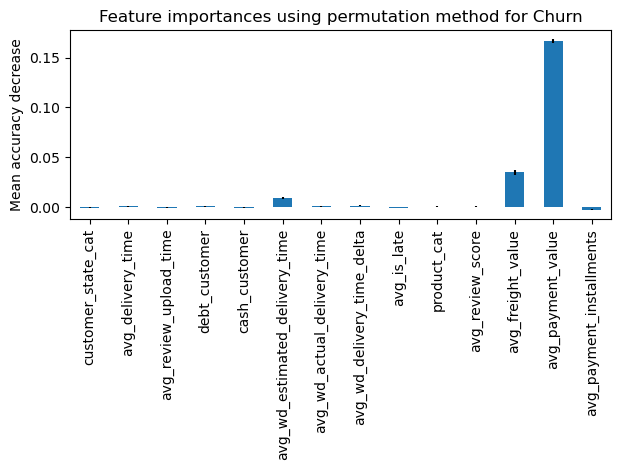

In [17]:
#get feature importance for undersampling data
#fit model
model=RandomForestClassifier()
clf_under.fit(X_train_under, y_train_under)

#Feature importance based on feature permutation
feature_names =X.columns
start_time = time.time()
result = permutation_importance(
    clf_under, X_test_scaled, y_test, n_repeats=10, random_state=42, n_jobs=2
)
forest_importances = pd.Series(result.importances_mean, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation method for Churn")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.savefig('Output/FI_churn.jpg' )
plt.show()

In [19]:
#Feature importance
forest_importances

customer_state_cat               -0.000442
avg_delivery_time                 0.000759
avg_review_upload_time           -0.000475
debt_customer                     0.000991
cash_customer                    -0.000468
avg_wd_estimated_delivery_time    0.009015
avg_wd_actual_delivery_time       0.000818
avg_wd_delivery_time_delta        0.001614
avg_is_late                      -0.000652
product_cat                       0.000722
avg_review_score                  0.000523
avg_freight_value                 0.034934
avg_payment_value                 0.166544
avg_payment_installments         -0.002653
dtype: float64

In [20]:
#Define input features based on feature improtance (>5%) & output
important_features_list=['avg_delivery_time', 'debt_customer', 'avg_wd_estimated_delivery_time', 
                        'avg_wd_actual_delivery_time', 'avg_wd_delivery_time_delta', 'product_cat', 'avg_review_score',
                        'avg_freight_value', 'avg_payment_value'] 
X=df[important_features_list].values 
Y=df['is_churn'].values


## K-fold Cross-Validation of Multiple Models

In [57]:
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier


# initial parameters
K_FOLD = 5
rus =RandomUnderSampler(sampling_strategy='majority')

models={"LogReg": LogisticRegression(solver='lbfgs'),
        "KNN": KNeighborsClassifier(),
        "LinearSVM": SVC(probability=True, kernel='linear'),
        "GB": GradientBoostingClassifier(),
        "DT": DecisionTreeClassifier(),
        "RF": RandomForestClassifier(),
        "NB": GaussianNB(),
       'AdaBoost': AdaBoostClassifier(),
       'MLP': MLPClassifier()}

ML = []
execution_time = []
auc_roc_agg = []
accuracy_agg = []
recall_agg = []
precision_agg = []

for model in models:
    rfc = models[model]
    pipeline = make_pipeline(rus, rfc)
    
    auc_roc = []
    accuracy = []
    recall = []
    precision = []
    
    kf = KFold(n_splits=K_FOLD)
    t0=dt.now()
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        scaler = StandardScaler()
        X_scaler = scaler.fit(X_train)
        X_train_scaled = X_scaler.transform(X_train)
        X_test_scaled = X_scaler.transform(X_test)
        y_pred = pipeline.fit(X_train_scaled, y_train).predict(X_test_scaled)
        auc_roc.append(roc_auc_score(y_test, y_pred))
        accuracy.append(accuracy_score(y_test, y_pred))
        recall.append(recall_score(y_test, y_pred))
        precision.append(precision_score(y_test, y_pred))

    ML.append(model)       
    execution_time.append(datetime.now()- t0)
    auc_roc_agg.append(mean(auc_roc))
    accuracy_agg.append(mean(accuracy))
    recall_agg.append(mean(recall))
    precision_agg.append(mean(precision))

/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/opt/ana

In [58]:
results_dict={'model': ML,
             'execution_time':execution_time,
             'auc_roc':auc_roc_agg,
            'accuracy':accuracy_agg,
              'recall': recall_agg,
              'precision': precision_agg
             }
results_df=pd.DataFrame(results_dict)
results_df

,model,execution_time,auc_roc,accuracy,recall,precision
0,LogReg,0 days 00:00:00.534935,0.800347,0.731432,0.905653,0.382844
1,KNN,0 days 00:00:03.625055,0.770647,0.719373,0.849006,0.365610
2,LinearSVM,0 days 00:08:01.155000,0.805423,0.711813,0.948463,0.369809
3,GB,0 days 00:00:10.739623,0.877049,0.827932,0.952101,0.501328
4,DT,0 days 00:00:00.641153,0.845804,0.849916,0.839515,0.542545
5,RF,0 days 00:00:13.255296,0.877066,0.840576,0.932824,0.521668
6,NB,0 days 00:00:00.177768,0.710923,0.561817,0.938769,0.275017
7,AdaBoost,0 days 00:00:03.031536,0.858388,0.796675,0.952679,0.457620
8,MLP,0 days 00:02:12.588960,0.832022,0.771398,0.924695,0.425754


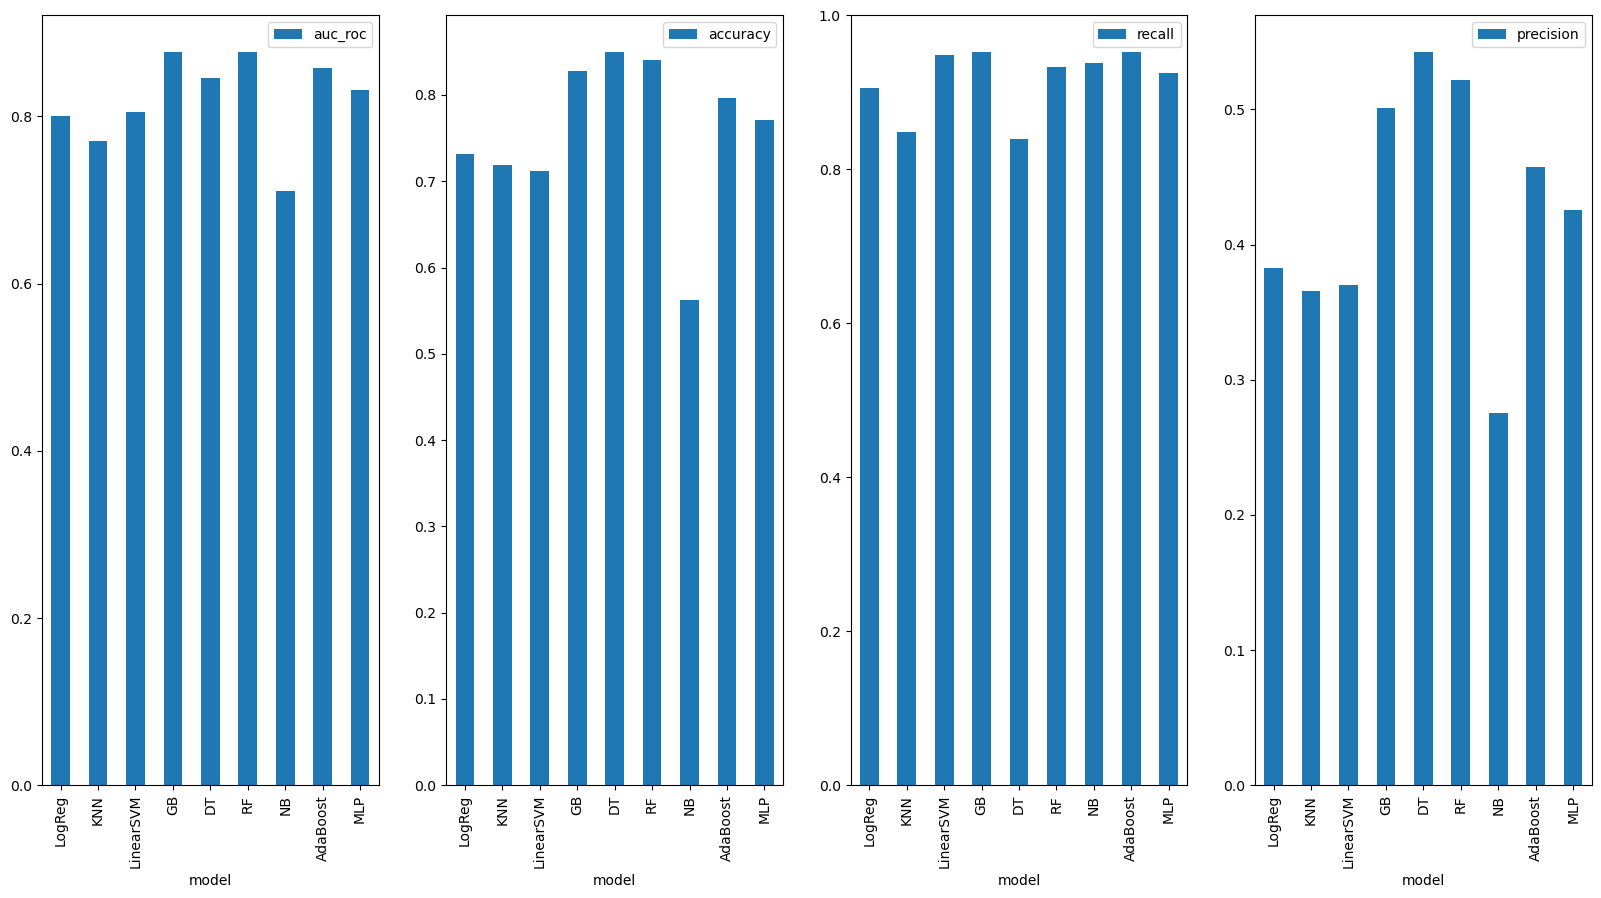

In [62]:
fig, (ax1, ax2,ax3, ax4)=plt.subplots(1, 4, figsize=(20, 10))
results_df.plot.bar(x='model', y='auc_roc', rot=90,ax=ax1)
results_df.plot.bar(x='model', y='accuracy', rot=90,ax=ax2)
results_df.plot.bar(x='model', y='recall', rot=90,ax=ax3)
results_df.plot.bar(x='model', y='precision', rot=90,ax=ax4)
plt.savefig('Output/model_performance.png')
plt.show()